# Pre-post Analysis Notebook

#### This notebook will use pre-post comparison to analyze the data for three policy changes in Florida, Texas, and Washington, in order to know the he effect of these policy changes on both opioid shipments and overdose deaths (For Texas, only analyze overdose deaths).

In [153]:
#import packages
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.formula.api as smf
import statsmodels as sm
from plotnine import *

In [154]:
#import dataset
working_dir = "../20_intermediate_files/"
final = working_dir + "analysis_df.csv"
final_df = pd.read_csv(final)
final_df.head()

,county_name,state,year,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,"AUTAUGA COUNTY, AL",AL,2003,1001,10012003,NaN,NaN,54571,NaN,NaN
1,"AUTAUGA COUNTY, AL",AL,2004,1001,10012004,NaN,NaN,54571,NaN,NaN
2,"AUTAUGA COUNTY, AL",AL,2005,1001,10012005,NaN,NaN,54571,NaN,NaN
3,"AUTAUGA COUNTY, AL",AL,2006,1001,10012006,NaN,20569.0,54571,NaN,37692.180829
4,"AUTAUGA COUNTY, AL",AL,2007,1001,10012007,NaN,12550.0,54571,NaN,22997.562808


## Pre-post analyze for Florida

In [155]:
#select the useful part of data for florida
fl_df = final_df[final_df['state'] == 'FL']
fl_df = fl_df.drop(columns = ['fips', 'merge_key'])

In [156]:
#calculate the average ship_rate(indicate opioid shipments) and drug_deaths(indicate overdose deaths)
fl_df = fl_df.groupby(['year'], as_index = False).mean()
fl_df['Policy Change'] = True
fl_df

/var/folders/ct/drx7_1ds4hsbrzckmbwbprcc0000gn/T/ipykernel_87318/278231620.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,year,drug_deaths,drug_quantity,population,death_rate,ship_rate,Policy Change
0,2003,55.090909,NaN,280616.567164,10.665085,NaN,True
1,2004,60.500000,NaN,280616.567164,11.653112,NaN,True
2,2005,66.852941,NaN,280616.567164,12.929873,NaN,True
3,2006,76.787879,64369.287879,280616.567164,15.364200,20236.200665,True
4,2007,72.055556,67498.515152,280616.567164,14.782214,22249.615728,True
5,2008,77.228571,78513.257576,280616.567164,16.242755,25006.537020,True
6,2009,85.212121,92369.507463,280616.567164,15.818041,28139.697625,True
7,2010,77.472222,111780.343284,280616.567164,16.661232,32924.369691,True
8,2011,70.921053,98019.179104,280616.567164,16.365855,32014.620726,True
9,2012,62.756757,73475.716418,280616.567164,14.251022,26531.341543,True


### Florida's opioid shipments changes

In [157]:
#For opioid shipments analyze: only have ship_rate data during 2006-2014
fl_shipmemt = fl_df[(fl_df['year'] >= 2006) & (fl_df['year'] <= 2014)]
fl_shipmemt

,year,drug_deaths,drug_quantity,population,death_rate,ship_rate,Policy Change
3,2006,76.787879,64369.287879,280616.567164,15.364200,20236.200665,True
4,2007,72.055556,67498.515152,280616.567164,14.782214,22249.615728,True
5,2008,77.228571,78513.257576,280616.567164,16.242755,25006.537020,True
6,2009,85.212121,92369.507463,280616.567164,15.818041,28139.697625,True
7,2010,77.472222,111780.343284,280616.567164,16.661232,32924.369691,True
8,2011,70.921053,98019.179104,280616.567164,16.365855,32014.620726,True
9,2012,62.756757,73475.716418,280616.567164,14.251022,26531.341543,True
10,2013,63.342857,66632.343284,280616.567164,13.016687,24928.568800,True
11,2014,69.694444,59935.611940,280616.567164,14.249487,23638.630393,True


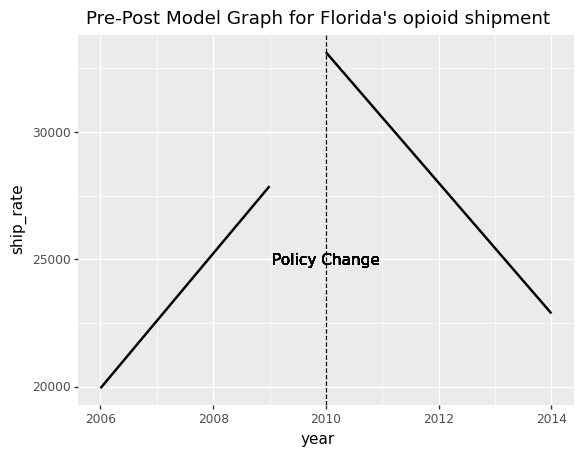

In [158]:
#plot the effect on opioid shipments during 2006-2014 (policy change in 2010)
fl_shipment_df = fl_shipmemt[fl_shipmemt["Policy Change"]]
fl_shiprate_plot = (
    ggplot(fl_shipment_df, aes(x="year", y="ship_rate"))
    + geom_smooth(
        method="lm",
        data=fl_shipment_df[fl_shipment_df["year"] < 2010],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=fl_shipment_df[fl_shipment_df["year"] >= 2010],
        se=False,
    )
    + geom_vline(xintercept=2010, linetype="dashed")
    + geom_text(x=2010, y=25000, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Florida's opioid shipment")
)
#fl_shiprate_plot.save("../30_results/prepost_Florida_opioid_shipment.pdf")
print(fl_shiprate_plot)

### Florida's overdose deaths changes

In [159]:
#For overdose deaths analyze:
fl_overdose = fl_df.copy()
fl_overdose

,year,drug_deaths,drug_quantity,population,death_rate,ship_rate,Policy Change
0,2003,55.090909,NaN,280616.567164,10.665085,NaN,True
1,2004,60.500000,NaN,280616.567164,11.653112,NaN,True
2,2005,66.852941,NaN,280616.567164,12.929873,NaN,True
3,2006,76.787879,64369.287879,280616.567164,15.364200,20236.200665,True
4,2007,72.055556,67498.515152,280616.567164,14.782214,22249.615728,True
5,2008,77.228571,78513.257576,280616.567164,16.242755,25006.537020,True
6,2009,85.212121,92369.507463,280616.567164,15.818041,28139.697625,True
7,2010,77.472222,111780.343284,280616.567164,16.661232,32924.369691,True
8,2011,70.921053,98019.179104,280616.567164,16.365855,32014.620726,True
9,2012,62.756757,73475.716418,280616.567164,14.251022,26531.341543,True


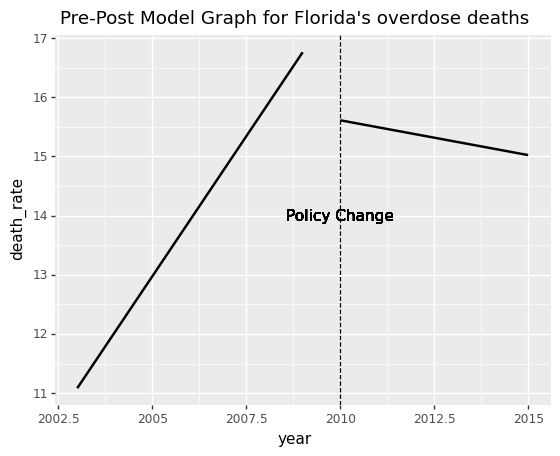

In [171]:
#plot the effect on overdose deaths during 2003-2015 (policy change in 2010)
fl_overdose_df = fl_overdose[fl_overdose["Policy Change"]]
fl_overdose_plot = (
    ggplot(fl_overdose_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=fl_overdose_df[fl_overdose_df["year"] < 2010],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=fl_overdose_df[fl_overdose_df["year"] >= 2010],
        se=False,
    )
    + geom_vline(xintercept=2010, linetype="dashed")
    + geom_text(x=2010, y=14, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Florida's overdose deaths")
)
#fl_overdose_plot.save("../30_results/prepost_Florida_overdose_deaths.pdf")
print(fl_overdose_plot)

## Pre-post analyze for Texas

In [161]:
#select the useful part of data for Texas
tx_df = final_df[final_df['state'] == 'TX']
tx_df = tx_df.drop(columns = ['fips', 'merge_key'])

In [162]:
#calculate the average drug_deaths(indicate overdose deaths)
tx_df = tx_df.groupby(['year'], as_index = False).mean()
tx_df['Policy Change'] = True
tx_df

/var/folders/ct/drx7_1ds4hsbrzckmbwbprcc0000gn/T/ipykernel_87318/683997573.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,year,drug_deaths,drug_quantity,population,death_rate,ship_rate,Policy Change
0,2003,55.375000,NaN,98998.271654,8.286052,NaN,True
1,2004,51.269231,NaN,98998.271654,7.534017,NaN,True
2,2005,51.896552,NaN,98998.271654,8.423059,NaN,True
3,2006,53.121212,12241.305677,98998.271654,12.431366,10872.652884,True
4,2007,57.310345,14317.616740,98998.271654,9.413322,12230.864161,True
5,2008,42.750000,14918.121076,98998.271654,10.116608,13254.831556,True
6,2009,52.685714,16212.635556,98998.271654,11.458267,14371.314275,True
7,2010,46.275000,17393.720000,98998.271654,10.696122,15335.236648,True
8,2011,55.472222,19645.026549,98998.271654,11.097906,17092.301475,True
9,2012,53.371429,18445.148472,98998.271654,10.258823,15963.594338,True


### Texas' overdose deaths changes

In [173]:
#For overdose deaths analyze:
tx_overdose = tx_df.copy()

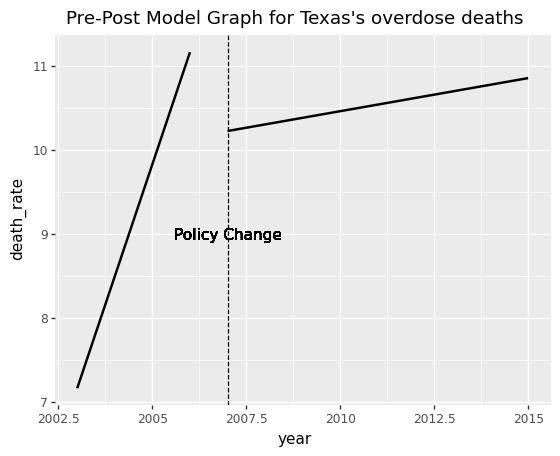

In [175]:
#plot the effect on overdose deaths during 2003-2015 (policy change in 2007)
tx_overdose_df = tx_overdose[tx_overdose["Policy Change"]]
tx_overdose_plot = (
    ggplot(tx_overdose_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=tx_overdose_df[tx_overdose_df["year"] < 2007],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=tx_overdose_df[tx_overdose_df["year"] >= 2007],
        se=False,
    )
    + geom_vline(xintercept=2007, linetype="dashed")
    + geom_text(x=2007, y=9, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Texas's overdose deaths")
)
#tx_overdose_plot.save("../30_results/prepost_Texas_overdose_deaths.pdf")
print(tx_overdose_plot)

## Pre-post analyze for Washington

In [165]:
#select the useful part of data for Washington
wa_df = final_df[final_df['state'] == 'WA']
wa_df = wa_df.drop(columns = ['fips', 'merge_key'])

In [166]:
#calculate the average ship_rate(indicate opioid shipments) and drug_deaths(indicate overdose deaths)
wa_df = wa_df.groupby(['year'], as_index = False).mean()
wa_df['Policy Change'] = True
wa_df

/var/folders/ct/drx7_1ds4hsbrzckmbwbprcc0000gn/T/ipykernel_87318/2201659894.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,year,drug_deaths,drug_quantity,population,death_rate,ship_rate,Policy Change
0,2003,51.636364,NaN,172424.102564,9.114519,NaN,True
1,2004,45.533333,NaN,172424.102564,11.992329,NaN,True
2,2005,47.066667,NaN,172424.102564,12.172425,NaN,True
3,2006,49.666667,36735.564103,172424.102564,13.571228,20499.854856,True
4,2007,54.266667,40555.717949,172424.102564,13.431365,23197.476032,True
5,2008,49.588235,44163.051282,172424.102564,14.211340,24813.568433,True
6,2009,50.312500,45796.000000,172424.102564,14.217796,25798.122714,True
7,2010,49.066667,50633.435897,172424.102564,12.046014,28473.403221,True
8,2011,57.666667,52564.666667,172424.102564,14.443726,30064.243229,True
9,2012,52.062500,52395.564103,172424.102564,14.153540,30028.071744,True


### Washington's opioid shipments changes

In [167]:
#For opioid shipments analyze: only have ship_rate data during 2006-2014
wa_shipmemt = wa_df[(wa_df['year'] >= 2006) & (wa_df['year'] <= 2014)]
wa_shipmemt

,year,drug_deaths,drug_quantity,population,death_rate,ship_rate,Policy Change
3,2006,49.666667,36735.564103,172424.102564,13.571228,20499.854856,True
4,2007,54.266667,40555.717949,172424.102564,13.431365,23197.476032,True
5,2008,49.588235,44163.051282,172424.102564,14.211340,24813.568433,True
6,2009,50.312500,45796.000000,172424.102564,14.217796,25798.122714,True
7,2010,49.066667,50633.435897,172424.102564,12.046014,28473.403221,True
8,2011,57.666667,52564.666667,172424.102564,14.443726,30064.243229,True
9,2012,52.062500,52395.564103,172424.102564,14.153540,30028.071744,True
10,2013,54.066667,49974.000000,172424.102564,13.799242,27997.163309,True
11,2014,53.562500,52230.641026,172424.102564,13.767839,28884.468939,True


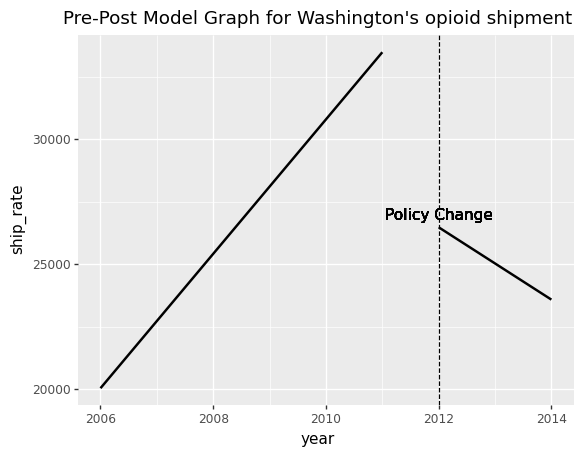

In [168]:
#plot the effect on opioid shipments during 2006-2014 (policy change in 2012)
wa_shipment_df = wa_shipmemt[wa_shipmemt["Policy Change"]]
wa_shiprate_plot = (
    ggplot(fl_shipment_df, aes(x="year", y="ship_rate"))
    + geom_smooth(
        method="lm",
        data=fl_shipment_df[fl_shipment_df["year"] < 2012],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=fl_shipment_df[fl_shipment_df["year"] >= 2012],
        se=False,
    )
    + geom_vline(xintercept=2012, linetype="dashed")
    + geom_text(x=2012, y=27000, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Washington's opioid shipment")
)
#wa_shiprate_plot.save("../30_results/prepost_Washington_opioid_shipment.pdf")
print(wa_shiprate_plot)

### Washington's overdose deaths changes

In [177]:
#For overdose deaths analyze:
wa_overdose = wa_df.copy()

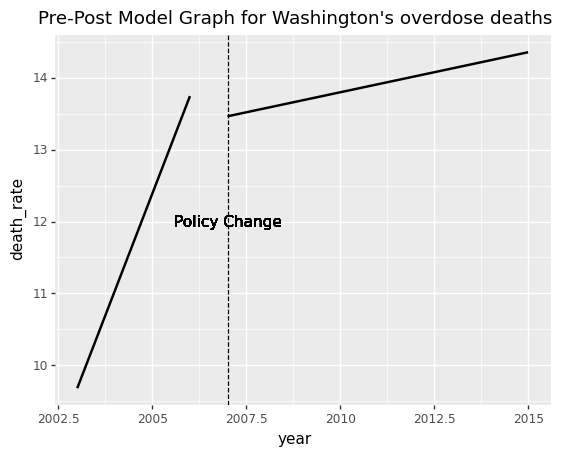

In [179]:
#plot the effect on overdose deaths during 2003-2015 (policy change in 2012)
wa_overdose_df = wa_overdose[wa_overdose["Policy Change"]]
wa_overdose_plot = (
    ggplot(wa_overdose_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=wa_overdose_df[wa_overdose_df["year"] < 2007],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=wa_overdose_df[wa_overdose_df["year"] >= 2007],
        se=False,
    )
    + geom_vline(xintercept=2007, linetype="dashed")
    + geom_text(x=2007, y=12, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Washington's overdose deaths")
)
#wa_overdose_plot.save("../30_results/prepost_Washington_overdose_deaths.pdf")
print(wa_overdose_plot)